In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#Printing the Dataset
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
false = data[data['Class'] == 1]
true = data[data['Class'] == 0]
n = len(false)/float(len(true))
print('Fraud Transactions:',n)

print('False Detection Cases: {}'.format(len(data[data['Class'] == 1])))
print('True Detection Cases: {}'.format(len(data[data['Class'] == 0])),"\n")

Fraud Transactions: 0.0017304750013189597
False Detection Cases: 492
True Detection Cases: 284315 



Text(0.5, 0, 'Class')

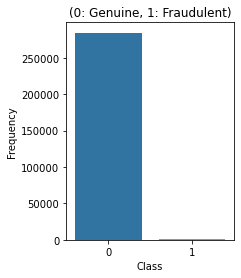

In [4]:
import seaborn as sns
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()

plt.figure(figsize=(3,4))
sns.barplot(x=count_classes.index, y=count_classes)
plt.title('(0: Genuine, 1: Fraudulent)')
plt.ylabel('Frequency')
plt.xlabel('Class')

In [5]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
# 2. Assigning Dependent and Independent variable

X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [7]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X_smote,y_smote = sm.fit_sample(X,y.values.ravel())

#Percentage of fraudlent records in original data
no_fraud_count = len(data[data.Class==0])
fraud_count = len(data[data.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((fraud_count*100)/(no_fraud_count+fraud_count)))

#Percentage of fraudlent records in sampled data
no_fraud_count = len(y_smote[y_smote==0])
fraud_count = len(y_smote[y_smote==1])
print('Percentage of fraud counts in the new data:{}%'.format((fraud_count*100)/(no_fraud_count+fraud_count)))

Percentage of fraud counts in original dataset:0.1727485630620034%
Percentage of fraud counts in the new data:50.0%


In [8]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote
                                                                                                   ,y_smote
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_smote))
print("Number transactions test dataset: ", len(X_test_smote))
print("Total number of transactions: ", len(X_train_smote)+len(X_test_smote))

X_train_smote_df = pd.DataFrame(X_train_smote)
y_train_smote_df = pd.DataFrame(y_train_smote)
X_test_smote_df = pd.DataFrame(X_test_smote)
y_test_smote_df = pd.DataFrame(y_test_smote)

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  398041
Number transactions test dataset:  170589
Total number of transactions:  568630


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [10]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l2')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_smote = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_smote)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [11]:
best_c = printing_Kfold_scores(X_train_smote_df,y_train_smote_df)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9140445899987404
Iteration  1 : recall score =  0.9142619521661333
Iteration  2 : recall score =  0.9128999174525352
Iteration  3 : recall score =  0.9158466919998993
Iteration  4 : recall score =  0.915046470735996

Mean recall score  0.9144199244706609

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.9170676407608012
Iteration  1 : recall score =  0.9169081882103883
Iteration  2 : recall score =  0.9151762263301398
Iteration  3 : recall score =  0.9185897274580366
Iteration  4 : recall score =  0.9177091183119819

Mean recall score  0.9170901802142696

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.9172187932989041
Iteration  1 : recall score =  0.9172106151868746
I

In [12]:
# Create a function to plot a fancy confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy score  of logistic regression for undersample data is 0.9450199016349237


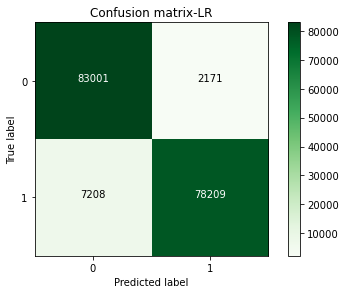

In [13]:
# Predictions on test set and plotting confusion matrix

# Use this C_parameter to build the final model
lr = LogisticRegression(solver='lbfgs',C = best_c, penalty = 'l2',max_iter=7600)
lr.fit(X_train_smote,y_train_smote.ravel())
y_pred_smote_log = lr.predict(X_test_smote.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_smote,y_pred_smote_log)
np.set_printoptions(precision=2)

print('The accuracy score  of logistic regression for undersample data is {}'.format(accuracy_score(y_test_smote,y_pred_smote_log)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-LR')
plt.show()

In [14]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Logistic regression is {}'.format(accuracy_score(y_test_smote, y_pred_smote_log)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_smote, y_pred_smote_log)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_smote, y_pred_smote_log)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_smote, y_pred_smote_log)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_smote, y_pred_smote_log)))







The accuracy of Logistic regression is 0.9450199016349237
 
Precision-->0.9729907937297835
 
F_1_Score -->0.943430822029349
 
recall_Score -->0.9156139878478523
 
matthews_corrcoef -->0.8916046933412807


The accuracy of logistic regression is 0.975667989185773


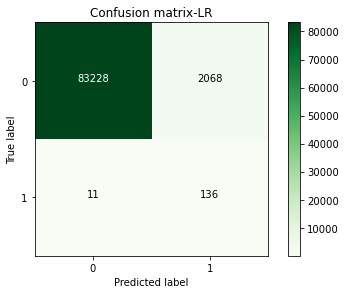

In [15]:
#Whole Data

lr = LogisticRegression(solver='lbfgs',C = best_c, penalty = 'l2',max_iter=7600)
lr.fit(X_train_smote,y_train_smote.ravel())
y_pred_log = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_log)
np.set_printoptions(precision=2)

log_score=(accuracy_score(y_test, y_pred_log))
print('The accuracy of logistic regression is {}'.format(accuracy_score(y_test, y_pred_log)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-LR')
plt.show()

In [16]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef


print('The accuracy of Logistic regression is {}'.format(accuracy_score(y_test, y_pred_log)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_log)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_log)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_log)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_log)))





The accuracy of Logistic regression is 0.975667989185773
 
Precision-->0.06170598911070781
 
F_1_Score -->0.1156954487452148
 
recall_Score -->0.9251700680272109
 
matthews_corrcoef -->0.23552795301862903


AUC= 0.9886450348448461


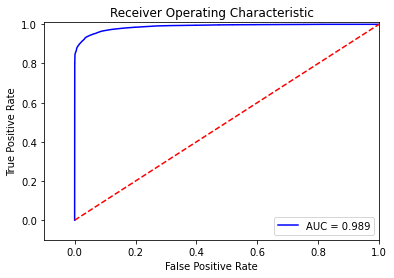

In [17]:
# ROC CURVE

lr = LogisticRegression(solver='lbfgs',C = best_c, penalty = 'l2',max_iter=7600)
y_pred_smote_score = lr.fit(X_train_smote,y_train_smote.ravel()).decision_function(X_test_smote)

fpr, tpr, thresholds = roc_curve(y_test_smote.ravel(),y_pred_smote_score)
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)):

            # Call the logistic regression model with a certain C parameter
            svc = LinearSVC(C = c_param, penalty = 'l2',max_iter=7600,dual=False)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            svc.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_smote_svm = svc.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_smote_svm)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [19]:
best_c_svm = printing_Kfold_scores(X_train_smote_df,y_train_smote_df)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9032119914346896
Iteration  1 : recall score =  0.9046850979107336
Iteration  2 : recall score =  0.9040698401580909
Iteration  3 : recall score =  0.905956665072854
Iteration  4 : recall score =  0.9049736247174077

Mean recall score  0.9045794438587551

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.9032371835243733
Iteration  1 : recall score =  0.9047859069028957
Iteration  2 : recall score =  0.9040948545413613
Iteration  3 : recall score =  0.9059314996099354
Iteration  4 : recall score =  0.9049736247174077

Mean recall score  0.9046046138591948

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  0 : recall score =  0.9032371835243733
Iteration  1 : recall score =  0.9047859069028957
I

The accuracy score of SVM for undersampling data is = 0.9412447461442415


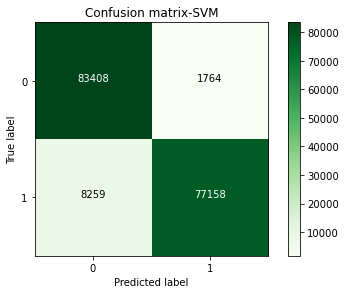

In [20]:
# Use this C_parameter to build the final model 
svm = LinearSVC(C = best_c_svm, penalty = 'l2',max_iter=7600,dual=False)
svm.fit(X_train_smote,y_train_smote.ravel())
y_pred_smote_svm = svm.predict(X_test_smote)

# Compute confusion matrix
cn_matrix = confusion_matrix(y_test_smote,y_pred_smote_svm)
np.set_printoptions(precision=2)

print('The accuracy score of SVM for undersampling data is = {}'.format(accuracy_score(y_test_smote,y_pred_smote_svm)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cn_matrix
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [21]:

print('In case of Undersampled data: ')
print(" ")
print('The accuracy of SVM is {}'.format(accuracy_score(y_test_smote, y_pred_smote_svm)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_smote, y_pred_smote_svm)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_smote, y_pred_smote_svm)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_smote, y_pred_smote_svm)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_smote, y_pred_smote_svm)))



In case of Undersampled data: 
 
The accuracy of SVM is 0.9412447461442415
 
Precision-->0.9776488178201262
 
F_1_Score -->0.9390102166862401
 
recall_Score -->0.9033096456208951
 
matthews_corrcoef -->0.8850713249227867


The accuracy of SVM is = 0.9806771765972637


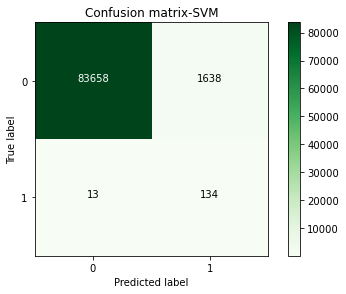

In [22]:
# Use this C_parameter to build the final model with the whole training dataset 

svm = LinearSVC(C = best_c_svm, penalty = 'l2',max_iter=7600,dual=False)
svm.fit(X_train_smote,y_train_smote.ravel())
y_pred_svm = svm.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_svm)
np.set_printoptions(precision=2)

print('The accuracy of SVM is = {}'.format(accuracy_score(y_test, y_pred_svm)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-SVM')
plt.show()

In [23]:


print('In case of whole data: ')
print(" ")
print('The accuracy of SVM is {}'.format(accuracy_score(y_test, y_pred_svm)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_svm)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_svm)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_svm)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_svm)))








In case of whole data: 
 
The accuracy of SVM is 0.9806771765972637
 
Precision-->0.07562076749435666
 
F_1_Score -->0.1396560708702449
 
recall_Score -->0.9115646258503401
 
matthews_corrcoef -->0.2595040857482882


AUC= 0.9881213942392431


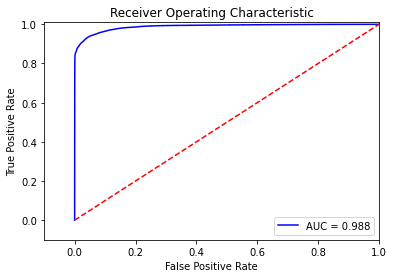

In [24]:
# ROC CURVE
svm = LinearSVC(C = best_c_svm, penalty = 'l2',max_iter=7600,dual=False)
y_pred_smote_score = svm.fit(X_train_smote,y_train_smote.ravel()).decision_function(X_test_smote)

fpr, tpr, thresholds = roc_curve(y_test_smote.ravel(),y_pred_smote_score)
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy score  of Naive Bayes for undersample data is 0.9136696973427361


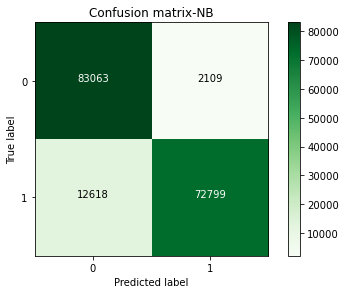

In [25]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_smote,y_train_smote.ravel())
y_pred_smote_nb = nb.predict(X_test_smote.values)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_smote,y_pred_smote_nb)
np.set_printoptions(precision=2)


print('The accuracy score  of Naive Bayes for undersample data is {}'.format(accuracy_score(y_test_smote,y_pred_smote_nb)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-NB')
plt.show()


In [26]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef


print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test_smote, y_pred_smote_nb)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_smote, y_pred_smote_nb)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_smote, y_pred_smote_nb)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test_smote, y_pred_smote_nb)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_smote, y_pred_smote_nb)))



The accuracy of Naive Bayes is 0.9136696973427361
 
Precision-->0.9718454637688898
 
F_1_Score -->0.9081428348666771
 
recall_Score -->0.8522776496481965
 
matthews_corrcoef -->0.8337196180066284


The accuracy of Naive Bayes is 0.9756562854768677


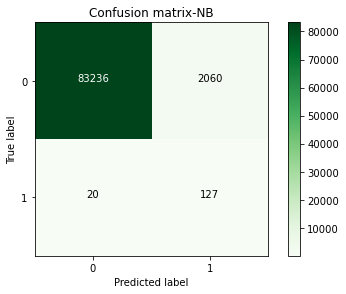

In [27]:
#Whole Data

nb = GaussianNB()
nb.fit(X_train_smote,y_train_smote.ravel())
y_pred_nb = nb.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_nb)
np.set_printoptions(precision=2)


log_score=(accuracy_score(y_test, y_pred_nb))
print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test, y_pred_nb)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-NB')
plt.show()

In [28]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef



print('The accuracy of Naive Bayes is {}'.format(accuracy_score(y_test, y_pred_nb)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred_nb)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred_nb)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,y_pred_nb)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,y_pred_nb)))




The accuracy of Naive Bayes is 0.9756562854768677
 
Precision-->0.058070416095107456
 
F_1_Score -->0.10882604970008569
 
recall_Score -->0.8639455782312925
 
matthews_corrcoef -->0.2203757509952753


AUC= 0.9484680046268776


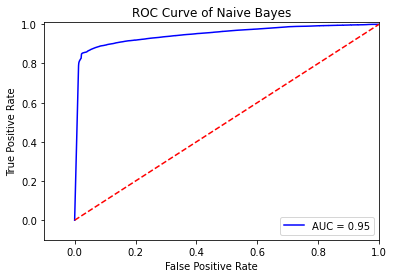

In [29]:
# ROC CURVE
nb = GaussianNB()

nb.fit(X_train_smote,y_train_smote.ravel())
y_scores = nb.predict_proba(X_test_smote)
fpr, tpr, threshold = roc_curve(y_test_smote, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()




In [30]:
# Voting Ensemble

from sklearn.ensemble import RandomForestClassifier,VotingClassifier


nb = GaussianNB()
log = LogisticRegression(solver='lbfgs',penalty = 'l2', C = best_c,max_iter=7600)
linearsvc = LinearSVC(C = best_c_svm, penalty = 'l2', dual = False,max_iter=7600)
nb = GaussianNB()
rf = RandomForestClassifier(max_features = 'log2', n_estimators = 103, min_samples_leaf = 50, criterion = 'gini', random_state = 12)

ensemble = VotingClassifier(estimators = [('rf', rf), ('lr', log), ('svc', linearsvc),('nb',nb)], voting = 'hard')

In [31]:
ensemble_pred = ensemble.fit(X_train_smote,y_train_smote.ravel()).predict(X_test)

In [32]:
ensemble_score=accuracy_score(y_test, ensemble_pred)
print('The accuracy of Voting Ensemble is {}'.format(accuracy_score(y_test, ensemble_pred)))

print(" ")
print('Precision-->{}'.format(precision_score(y_test,ensemble_pred)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,ensemble_pred)))
print(" ")
print('recall_Score -->{}'.format(recall_score(y_test,ensemble_pred)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test,ensemble_pred)))

prec_score_3=(precision_score(y_test,ensemble_pred))







The accuracy of Voting Ensemble is 0.9967112577975961
 
Precision-->0.3333333333333333
 
F_1_Score -->0.4881602914389799
 
recall_Score -->0.9115646258503401
 
matthews_corrcoef -->0.5501533184790268


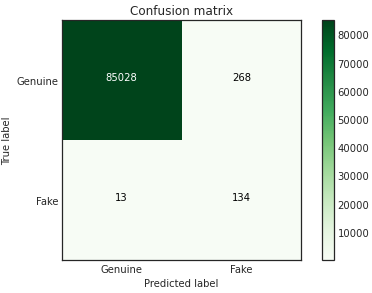

In [33]:
with plt.style.context(("seaborn-white")):
    conf_matrix = confusion_matrix(y_test, ensemble_pred)
    plot_confusion_matrix(conf_matrix, classes = ['Genuine', 'Fake'], normalize = False)
    plt.savefig('ensemble_plot.png', bbox_inches='tight')

AUC= 0.9999581022994394


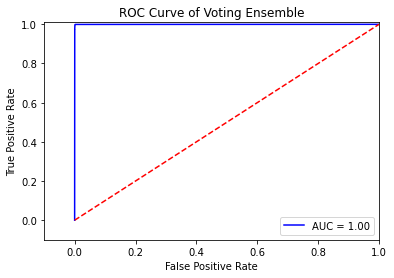

In [34]:
# ROC CURVE


rf_fit=rf.fit(X_train_smote,y_train_smote.ravel())
y_scores1 = rf.predict_proba(X_test_smote)
fpr, tpr, threshold = roc_curve(y_test_smote, y_scores1[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Voting Ensemble')
plt.show()




In [35]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False) 
    
    # Different n parameters
    n_param_range = [3,5,7,9]

    results_table = pd.DataFrame(index = range(len(n_param_range),2), columns = ['n_parameter','Mean recall score'])
    results_table['n_parameter'] = n_param_range
    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for n_param in n_param_range:
        print('-------------------------------------------')
        print('n parameter: ', n_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold.split(x_train_data)): 
            # Call the KNN  with a certain n parameter
            knn= KNeighborsClassifier(n_neighbors = n_param, metric = 'minkowski', p = 2)

            # Use the training data to fit the model.
            knn.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_smote = knn.predict(x_train_data.iloc[indices[1],:].values)
            
            # Calculate the recall score 
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_smote)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
         
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_n = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['n_parameter']
    
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_n)
    print('*********************************************************************************')
    
    return best_n




In [36]:
best_n = printing_Kfold_scores(X_train_smote_df,y_train_smote_df)

-------------------------------------------
n parameter:  3
-------------------------------------------

Iteration  0 : recall score =  1.0
Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  1.0

Mean recall score  1.0

-------------------------------------------
n parameter:  5
-------------------------------------------

Iteration  0 : recall score =  1.0
Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  1.0

Mean recall score  1.0

-------------------------------------------
n parameter:  7
-------------------------------------------

Iteration  0 : recall score =  1.0
Iteration  1 : recall score =  1.0
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  1.0

Mean recall score  1.0

-------------------------------------------
n parameter:  9
-------------------------

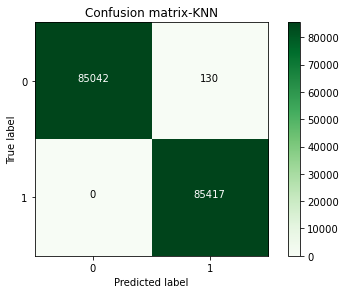

In [37]:
# Use this n_parameter to build the final model 

knn= KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train_smote,y_train_smote.ravel())
y_pred_smote_knn = knn.predict(X_test_smote)

# Compute confusion matrix
cn_matrix = confusion_matrix(y_test_smote,y_pred_smote_knn)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cn_matrix
                      , classes=class_names
                      , title='Confusion matrix-KNN')
plt.show()


In [38]:
from sklearn.metrics import recall_score,f1_score,precision_score,classification_report,matthews_corrcoef

print('Accuracy -->{}'.format(accuracy_score(y_test_smote,y_pred_smote_knn)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test_smote,y_pred_smote_knn)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test_smote, y_pred_smote_knn)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test_smote,y_pred_smote_knn)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test_smote, y_pred_smote_knn)))

Accuracy -->0.9992379344506387
 
Precision-->0.9984803675172712
 
Recall-->1.0
 
F_1_Score -->0.9992396059989238
 
matthews_corrcoef -->0.9984770221506267


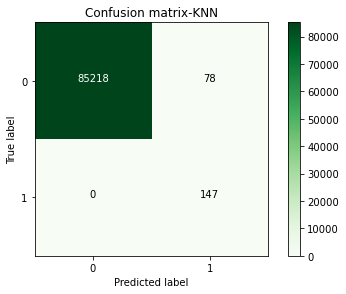

In [45]:
# Use this C_parameter to build the final model

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train_smote,y_train_smote.ravel())
y_pred = knn.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)



# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix-KNN')
plt.show()




In [46]:

print('Accuracy -->{}'.format(accuracy_score(y_test,y_pred)))
print(" ")
print('Precision-->{}'.format(precision_score(y_test,y_pred)))
print(" ")
print('Recall-->{}'.format(recall_score(y_test,y_pred)))
print(" ")
print('F_1_Score -->{}'.format(f1_score(y_test,y_pred)))
print(" ")
print('matthews_corrcoef -->{}'.format(matthews_corrcoef(y_test, y_pred)))



Accuracy -->0.9990871107053826
 
Precision-->0.6533333333333333
 
Recall-->1.0
 
F_1_Score -->0.7903225806451613
 
matthews_corrcoef -->0.8079207166853977


AUC= 0.9995773258817451


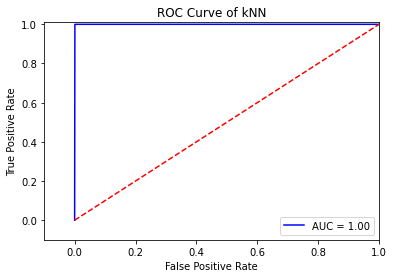

In [48]:
knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train_smote,y_train_smote.ravel())
y_scores = knn.predict_proba(X_test_smote)
fpr, tpr, threshold = roc_curve(y_test_smote, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC=",roc_auc)



plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [49]:
log_score=(accuracy_score(y_test, y_pred_log))
nb_score=(accuracy_score(y_test, y_pred_nb))
svc_score=(accuracy_score(y_test, y_pred_svm))
knn_score=(accuracy_score(y_test, y_pred))
ensemble_score=accuracy_score(y_test, ensemble_pred)

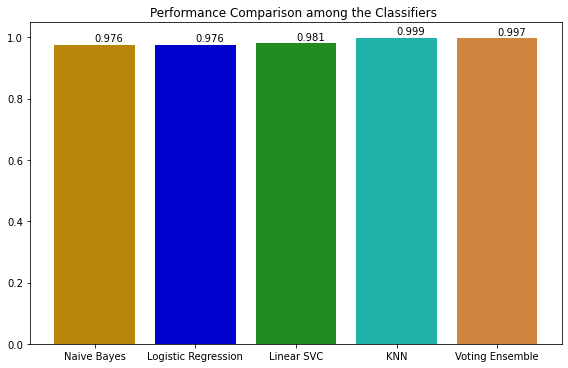

In [50]:
## Comparison


import numpy as np
import matplotlib.pyplot as plt
 
height = [round(nb_score,3),round(log_score,3),round(svc_score,3),round(knn_score,3), round(ensemble_score,3)]
bars = ('Naive Bayes','Logistic Regression','Linear SVC','KNN', 'Voting Ensemble')
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(2,height=0.5,width=0.3)
y_pos = np.arange(len(bars))
label= [nb_score, log_score,svc_score,knn_score, ensemble_score]
log_score
plt.bar(y_pos, height, color=['darkgoldenrod','mediumblue','forestgreen' ,'lightseagreen','peru'])
plt.xticks(y_pos, bars)
for index,data in enumerate(height):
    plt.text(x=index , y =data+0.01 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.title('Performance Comparison among the Classifiers ')
plt.show()